# Data Preparation

In this part, we outline the data preparation process that we followed for our project. To begin, our team undertook an extensive exploration of the cancer-related dataset for US counties. This process involved analyzing the dataset to gain a better understanding of its structure, format, and content.

Our dataset was obtained from the data.world website, which aggregated data from various sources, including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. We carefully curated and cleaned the dataset to ensure that it was suitable for our analysis. This involved removing any missing or inconsistent data points, standardizing the format of the data, and addressing any potential data quality issues.

Overall, our data preparation process was a critical step in ensuring the accuracy and validity of our analysis. By carefully selecting and curating our dataset, we were able to generate meaningful insights and recommendations to address the issue of cancer in US counties.

In [12]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from cancerolstools import preprocess as pp

# Data cleaning and exploring 

Data cleaning and exploration are crucial steps in any data analysis project. In our project, firstly, our team try to enhance the geographic information available for each county in the United States, which required us to start by cleaning the Federal Information Processing Standards (FIPS) dataset.

To accomplish this, we clean the data set at the beginning. We used the pandas library in Python to read in the FIPS dataset as a pandas dataframe. We specified the file location, the tab separator, and the file encoding. We also set the data types for the columns to be strings to ensure consistency.

In [13]:
fips_df = pp.import_fips()
fips_df

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY
0,01,001,Autauga,Alabama,01001,AL,AL | AUTAUGA
1,01,003,Baldwin,Alabama,01003,AL,AL | BALDWIN
2,01,005,Barbour,Alabama,01005,AL,AL | BARBOUR
3,01,007,Bibb,Alabama,01007,AL,AL | BIBB
4,01,009,Blount,Alabama,01009,AL,AL | BLOUNT
...,...,...,...,...,...,...,...
3138,56,037,Sweetwater,Wyoming,56037,WY,WY | SWEETWATER
3139,56,039,Teton,Wyoming,56039,WY,WY | TETON
3140,56,041,Uinta,Wyoming,56041,WY,WY | UINTA
3141,56,043,Washakie,Wyoming,56043,WY,WY | WASHAKIE


Our team also explored the dataset to gain insights into its structure, format, and contents. This process involved using various pandas dataframe methods to examine the distribution of data across different columns, identify any trends or patterns in the data, and generate visualizations to help understand the relationships between variables.

To start, we used the describe() method to generate descriptive statistics for the dataset. This allowed us to quickly get an overview of the data, including the number of observations, mean, standard deviation, minimum, and maximum values for each column.

In [14]:
print(fips_df.describe())

       StateFIPS CountyFIPS_3  CountyName StateName CountyFIPS StateAbbr  \
count       3143         3143        3143      3143       3143      3143   
unique        51          325        1878        51       3143        51   
top           48          001  Washington     Texas      01001        TX   
freq         254           49          30       254          1       254   

        STATE_COUNTY  
count           3143  
unique          3143  
top     AL | AUTAUGA  
freq               1  


Next, our team also examined the FIPS dataset to understand the total count of counties in each state and obtain a comprehensive overview of the differences in counties across the country. We printed the subset of the data where the count is greater than one, indicating potential discrepancies between FIPS codes and county names.

In [15]:
fips_county = fips_df.groupby(['StateName', 'StateFIPS']).size().reset_index()
fips_county.columns = ['StateName', 'StateFIPS', 'Count']
print(fips_county[fips_county['Count'] > 1])

         StateName StateFIPS  Count
0          Alabama        01     67
1           Alaska        02     30
2          Arizona        04     15
3         Arkansas        05     75
4       California        06     58
5         Colorado        08     64
6      Connecticut        09      8
7         Delaware        10      3
9          Florida        12     67
10         Georgia        13    159
11          Hawaii        15      5
12           Idaho        16     44
13        Illinois        17    102
14         Indiana        18     92
15            Iowa        19     99
16          Kansas        20    105
17        Kentucky        21    120
18       Louisiana        22     64
19           Maine        23     16
20        Maryland        24     24
21   Massachusetts        25     14
22        Michigan        26     83
23       Minnesota        27     87
24     Mississippi        28     82
25        Missouri        29    115
26         Montana        30     56
27        Nebraska        31

Moreover, the FIPS dataset can be a useful tool for filtering locations based on specific areas of interest across the country. For example, we can use the condition ['STATE COUNTY'] == 'CA | ALAMEDA' to filter the dataset and view information specifically for Alameda County. Based on the results below, we can see that Alameda has county FIPS of 06001. 

In [16]:
alameda_info = fips_df[fips_df['STATE_COUNTY'] == 'CA | ALAMEDA']
alameda_info

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY
187,06,001,Alameda,California,06001,CA,CA | ALAMEDA


Secondly, our team try to explore the Cancer Regression dataset which is to predict cancer death rates based on various demographic and health-related factors for each county in the United States. Our team conducted data exploration and cleaning on this dataset to better understand the variables related to cancer death rates and to prepare the data for further analysis.

In [17]:
cancer_df = pp.import_cancer()
cancer_df

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


We used the describe() method to generate descriptive statistics for the cancer dataset. This allowed us to quickly get an overview of the data, including the number of observations, mean, standard deviation, minimum, and maximum values for each features.

In [18]:
print(cancer_df.describe())

        avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640

We use the two scatter plots to show the relationship between incidence rate and target death rate, as well as incidence rate and median income. The first scatter plot suggests a positive correlation between incidence rate and target death rate, as higher incidence rates tend to be associated with higher target death rates. The second scatter plot suggests not clear correlation between incidence rate and median income. Based on these results, it appears that the incidence rate and target death rate are more closely related features than incidence rate and medincome. 

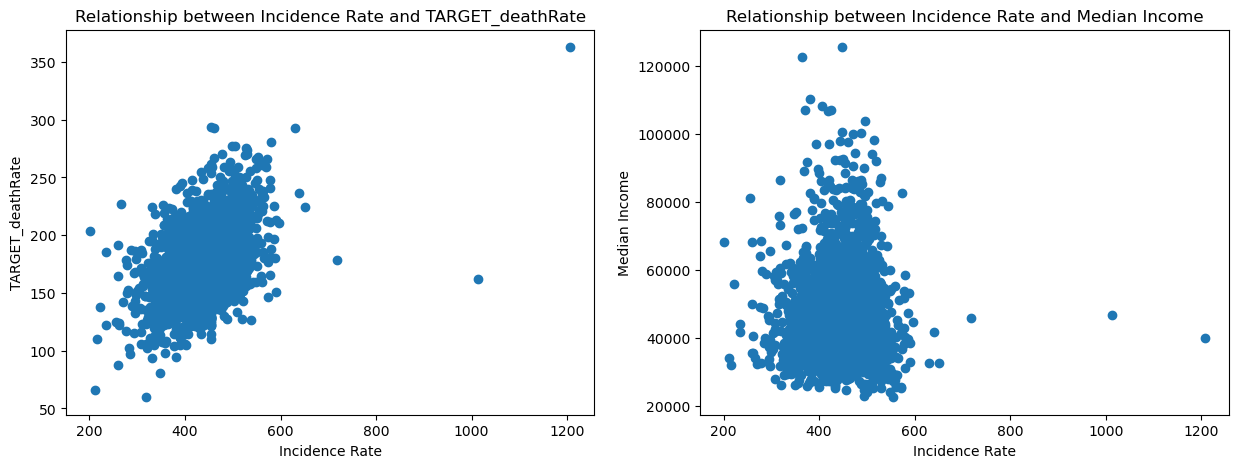

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot incidenceRate vs TARGET_deathRate
ax[0].scatter(cancer_df['incidenceRate'], cancer_df['TARGET_deathRate'])
ax[0].set_xlabel('Incidence Rate')
ax[0].set_ylabel('TARGET_deathRate')
ax[0].set_title('Relationship between Incidence Rate and TARGET_deathRate')

# plot incidenceRate vs medIncome
ax[1].scatter(cancer_df['incidenceRate'], cancer_df['medIncome'])
ax[1].set_xlabel('Incidence Rate')
ax[1].set_ylabel('Median Income')
ax[1].set_title('Relationship between Incidence Rate and Median Income')

plt.show()
plt.savefig('figures/Incidence_Rate.png')

To prepare for our later visualizations and model analysis, our team wrote a series of code below to clean and transform the cancer-related dataset for US counties.

The primary steps are:

* Adding a new column that divides the death rate by the income of a county.
* Extracting state and county from "Geography" column and create new columns for these values.
* Manually changing 2 county names that are imported with odd characters.
* Merge cancer and fips data
* Add a new column that divides the death rate by the log income
* Create a new dataframe that preserves only the FIPS code and the death rate divided by Log income for conveniences in plotting.

All of these processes are implemented within the preprocess module of the cancerolstools package. In particular, `cancer_preprocess` will perform cancer-only modifications listed above while `merge_data` will merge a modified or unmodified cancer dataset with the fips dataset. For details on the implementation, the package codes are available in the repository.

In [20]:
cancer_df = pp.cancer_preprocess(cancer_df)
cancer_df = pp.merge_data(cancer_df, fips_df)

graphdata = pp.graph_dataframe(cancer_df)

We additionally create another dataframe, `data_with_anomalies`, that will aid in visualizing the particular spread across the different counties of the United States. 

To help symmetrize median income and thus our ratio, we first applied a log transformation, then calculated our ratios. Then, to identify any anomalies, that is, counties with an unusually high or small ratio, we standardized our ratio values, creating a new variable called “Anomalies,” representing the standard deviations away from the mean ratio. Finally, to focus on significant differences to the mean ratio, we changed any anomalies less than |1| to 0. The above code completes this processing and compiles the results in a dataframe with anomalies. For specific documentation and implementation, please visit the cancerolstools package.

In [21]:
data_with_anomalies = pp.graph_dataframe(cancer_df)
data_with_anomalies

,fips,anomalies
0,53035,0.000000
1,53037,0.000000
2,53039,0.000000
3,16061,0.000000
4,21135,0.000000
...,...,...
14223,48159,0.000000
14224,50011,0.000000
14225,51067,0.000000
14226,53021,0.000000
